In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# 加载鸢尾花数据集
iris = load_iris()

# 将数据集转换为DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# 增加标签列，如果target列存在则被新数据覆盖
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# 基于df数据进行模型训练
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 创建并拟合高斯混合模型
gmm = GaussianMixture(n_components=3, random_state=42)
# gmm.fit(df.iloc[:, :-1])  # 只选择特征列进行GMM拟合
gmm.fit(df.drop('target', axis=1))  # 选择特征列进行GMM拟合
# 获取每个样本的聚类标签
# labels = gmm.predict(df.iloc[:, :-1])  # 只选择特征列进行预测
labels = gmm.predict(df.drop('target', axis=1))  # 选择特征列进行预测
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# 画图展示，未来方便展示，先降低维度到二维度空间

# 使用 PCA 将数据降维到二维，便于可视化
pca = PCA(n_components=2)
# X_pca = pca.fit_transform(df.iloc[:, :-1])  # 只选择特征列进行PCA降维
X_pca = pca.fit_transform(df.drop('target', axis=1))  # 选择特征列进行PCA降维
# X_pca是一个特征向量组成的矩阵
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

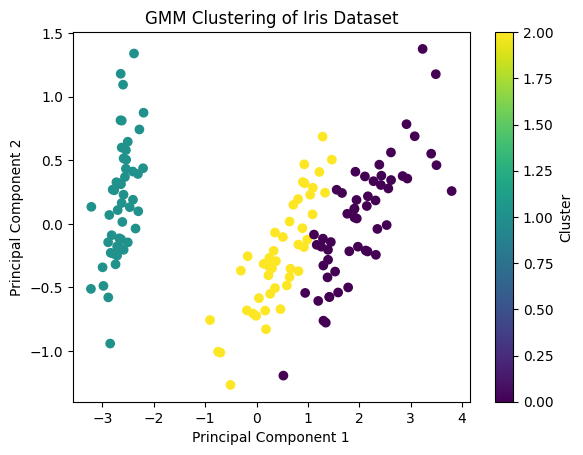

In [7]:
# 获取每个样本的聚类标签
# labels = gmm.predict(df.iloc[:, :-1])  # 只选择特征列进行预测
labels = gmm.predict(df.drop('target', axis=1))  # 选择特征列进行预测
# 绘制聚类结果
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering of Iris Dataset')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
# PCA过程
# 具体过程
# 1.中心化：对原始数据进行中心化处理，即减去每个特征的均值，使得每个特征的均值为0。
# 2.计算协方差矩阵：计算中心化后的数据的协方差矩阵。
# 3.特征值分解：对协方差矩阵进行特征值分解，得到特征值和特征向量。
# 4.排序：按特征值从大到小排序，选择前几个特征向量作为主成分。
# 5.转换：用选择的主成分将原始数据转换到新的坐标系。

# 说人话就是
# 本例子中，对于鸢尾花数据集，假设原始数据集有四个特征（sepal length, sepal width, petal length, petal width）。
# 通过PCA降维到二维，得到两个主成分，分别表示数据中两个最重要的方向。这两个主成分分别称为"Principal Component 1"和"Principal Component 2"
# X_pca[:, 0]：表示第一个主成分的值。
# X_pca[:, 1]：表示第二个主成分的值。


# PCA产生的是矩阵
# X_pca 矩阵
# X_pca 是通过 PCA 降维后的数据矩阵，形状为 (n_samples, n_components)。每一行代表一个样本，每一列代表一个主成分（新特征）
X_pca = np.array([[1.2, 0.5,9.1,5.1],
                  [2.3, 0.7,10.2,4.1],
                  [3.1, 1.2,9.8,2.2]])
X_pca

array([[ 1.2,  0.5,  9.1,  5.1],
       [ 2.3,  0.7, 10.2,  4.1],
       [ 3.1,  1.2,  9.8,  2.2]])

In [20]:
X_pca[:, 0]

array([1.2, 2.3, 3.1])

In [21]:
X_pca[:, 1]

array([0.5, 0.7, 1.2])

In [29]:
X_pca[:, 3]

array([5.1, 4.1, 2.2])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
gmm模型预测的结果：[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


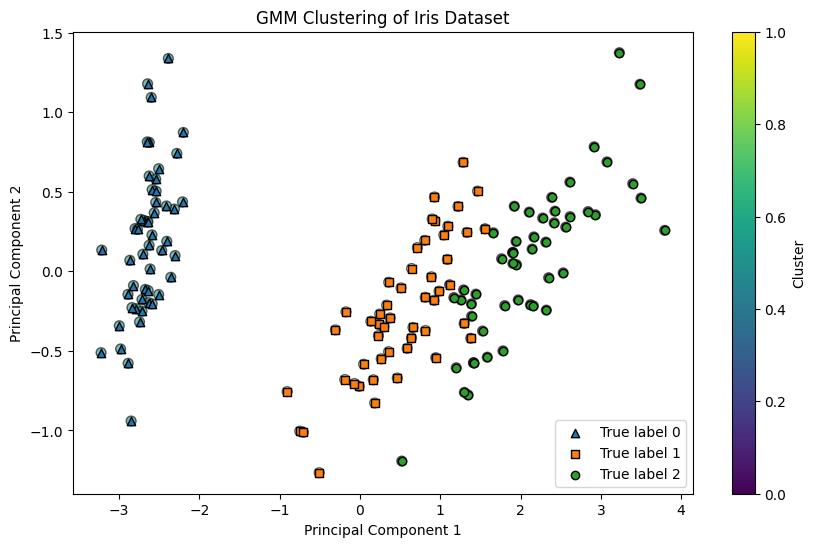

In [34]:
# 优化

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 加载数据集
iris = load_iris()

# 将数据集转换为DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 显示DataFrame的前几行
print(df.head())

# 使用 PCA 将数据降维到二维，便于可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))  # 选择特征列进行PCA降维

# 创建并拟合高斯混合模型
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df.drop('target', axis=1))  # 选择特征列进行GMM拟合

# 获取每个样本的聚类标签
labels = gmm.predict(df.drop('target', axis=1))  # 选择特征列进行预测

print(f"gmm模型预测的结果：{labels}")

# 绘制聚类结果
plt.figure(figsize=(10, 6))

# 绘制PCA降维后的数据点，并根据GMM预测的标签着色
# 将两个特征向量作为新的坐标轴
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# 绘制原始标签数据点，使用不同的形状进行区分
# plt.plot 函数中的 label 参数指定了每条曲线的标签。plt.legend() 函数会自动将这些标签添加到图表中的图例中。
for label, marker in zip(range(3), ['^', 's', 'o']):
    plt.scatter(X_pca[df['target'] == label, 0], X_pca[df['target'] == label, 1],
                label=f'True label {label}', marker=marker, edgecolor='k')

# 添加图例和标签
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering of Iris Dataset')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


In [35]:
# 优化2，基于df上直接生成新列
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 加载数据集
iris = load_iris()

# 将数据集转换为DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 显示DataFrame的前几行
print(df.head())

# 使用 PCA 将数据降维到二维，便于可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))  # 选择特征列进行PCA降维

# 创建并拟合高斯混合模型
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df.drop('target', axis=1))  # 选择特征列进行GMM拟合

# 获取每个样本的聚类标签
labels = gmm.predict(df.drop('target', axis=1))  # 选择特征列进行预测

print(f"gmm模型预测的结果：{labels}")

# 将聚类标签添加到DataFrame中，生成新列
df['predicted_cluster'] = labels
df


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
gmm模型预测的结果：[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [30]:
# 指定了PCA的n_components参数为2，这意味着你希望将数据降维到二维空间。这样做通常是为了可视化目的，以便在二维平面上展示数据的聚类情况。

# 至于是否直接根据特征向量作为主成分，这取决于你的需求和数据的特性。在实际应用中，PCA的n_components参数通常会基于以下几个因素来确定：

# 数据的方差贡献率（explained variance ratio）：PCA会按照特征值的大小对特征向量进行排序，特征值越大对应的特征向量包含的信息量越多。
# 因此，可以根据方差贡献率来确定需要保留的主成分数量，以保留数据中大部分的信息。

# 降维后的数据表示效果：通过观察降维后的数据表示效果，可以选择合适的主成分数量。有时候，降维到较低维度可能会丢失较多的信息，而增加维度则可能保留更多的信息。

# 计算资源和时间成本：较高维度的数据处理通常需要更多的计算资源和时间，因此在实际应用中需要权衡计算成本和数据表示效果。

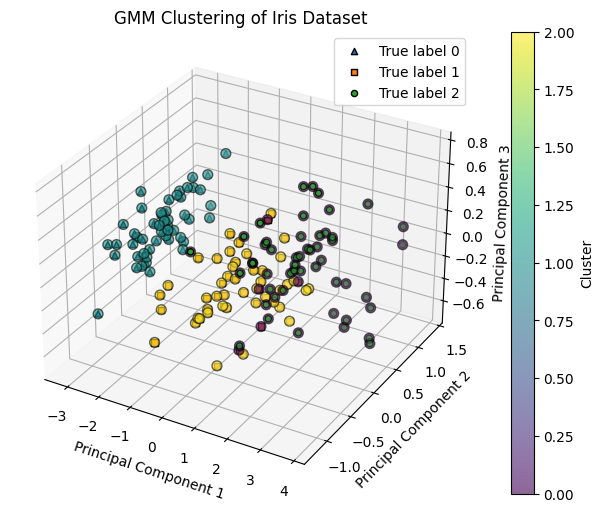

In [33]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 加载数据集
iris = load_iris()

# 将数据集转换为DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 使用 PCA 将数据降维到三维，便于可视化
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.drop('target', axis=1))  # 选择特征列进行PCA降维

# 创建并拟合高斯混合模型
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df.drop('target', axis=1))  # 选择特征列进行GMM拟合

# 获取每个样本的聚类标签
labels = gmm.predict(df.drop('target', axis=1))  # 选择特征列进行预测

# 绘制聚类结果
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制PCA降维后的数据点，并根据GMM预测的标签着色
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# 绘制原始标签数据点，使用不同的形状进行区分
for label, marker in zip(range(3), ['^', 's', 'o']):
    ax.scatter(X_pca[df['target'] == label, 0], X_pca[df['target'] == label, 1], X_pca[df['target'] == label, 2],
               label=f'True label {label}', marker=marker, edgecolor='k')

# 添加图例和标签
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('GMM Clustering of Iris Dataset')
ax.legend()

# 添加颜色条
plt.colorbar(scatter, label='Cluster')

# 显示图形
plt.show()
